# Lista de exercícios sobre TensorFlow com Keras - Funcionamento Básico

## Introdução a KERAS

Keras é um framework em python para DL  que fornece uma maneira conveniente de definir e treinar quase qualquer tipo de modelo de DL. Keras foi inicialmente desenvolvido para pesquisadores, com o objetivo de permitir uma rápida experimentação.
​
Keras possui os seguintes recursos principais:
* Permite que o mesmo código seja executado sem problemas na CPU ou na GPU.
* Possui uma API amigável que facilita a prototipagem rápida de modelos de DL.
* Tem suporte embutido para redes convolucionais (para visão computacional), redes recorrentes (para processamento sequencial) e qualquer combinação de ambos.
* Suporta arquiteturas de rede arbitrárias:
  * modelos com múltiplas entradas ou múltiplas saídas,
  * compartilhamento de camadas,
  * compartilhamento de modelos e assim por diante.
  
Isso significa que Keras é apropriado para construir essencialmente qualquer modelo de DL, desde uma *generative adversarial network* a uma *neural Turing machine*.

Keras é distribuído sob a licença MIT permissiva, o que significa que pode ser usado livremente em projetos comerciais. É compatível com qualquer versão do Python de 2.7 a 3.6 (a partir de meados de 2017).
​
Keras tem mais de 200.000 usuários, desde pesquisadores acadêmicos e engenheiros de startups e grandes empresas até estudantes de pós-graduação e amadores. Keras é usado no Google, Netflix, Uber, CERN, Yelp, Square e centenas de startups trabalhando em uma ampla gama de problemas. Keras também é uma estrutura popular no Kaggle, o site de competição de ML, onde quase todas as competições recentes de DL foram vencidas usando modelos Keras.

### Desenvolvendo com Keras: uma visão geral rápida

O fluxo de trabalho típico do Keras segue a seguinte sequência de passos:
1. ** Defina seus dados de treinamento **: tensores de entrada e tensores de destino.
1. ** Defina uma rede de camadas ** (ou modelo) que mapeie suas entradas para seus destinos.
1. ** Configure o processo de aprendizado ** escolhendo uma ** função de perda **, um ** otimizador ** e algumas ** métricas ** para monitorar.
1. ** Iterar em seus dados de treinamento ** chamando o método `fit()` do seu modelo.

Existem duas formas de definir um modelo:
1. usando a classe ** Sequential ** (somente para pilhas lineares de camadas, que é a arquitetura de rede mais comum) ou
1. a ** API funcional ** (para gráficos acíclicos dirigidos de camadas, que permite construir arquiteturas completamente arbitrárias).

Antes de iniciar vamos importar o Tensorflow especificando a versão desejada ([The %tensorflow_version magic](https://colab.research.google.com/notebooks/tensorflow_version.ipynb#scrollTo=aR_btJrKGdw7)) e imprimir a versão que foi importada:

In [ ]:
try:
  # A diretiva "magic" %tensorflow_version só existe no Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

print(tf.__version__)

2.1.0


Como exemplo, veja um modelo de duas camadas definido usando a classe `Sequential` (observe que estamos passando a forma esperada dos dados de entrada para a primeira camada):

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


E aqui está o mesmo modelo definido usando a `functional API`:

In [ ]:
input_tensor = tf.keras.layers.Input(shape=(784,))
x = tf.keras.layers.Dense(32, activation='relu')(input_tensor)
output_tensor = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs=input_tensor, outputs=output_tensor)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


** Com a API funcional, você está manipulando os tensores de dados que o modelo processa e aplicando camadas a esse tensores como se fossem funções. **

Depois que a arquitetura do modelo for definida, não importa se você usou um modelo sequencial ou a `functional API`. Todas as etapas a seguir são as mesmas.

O processo de aprendizado é configurado na etapa de compilação, na qual você especifica as funções do otimizador e da perda que o modelo deve usar, bem como as métricas que deseja monitorar durante o treinamento.

Veja um exemplo com uma única função de perda, que é de longe o caso mais comum:

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),loss='mse',metrics=['accuracy'])

Agora veremos todos estos passos em detalhe, usando um exemplo muito didatico de como construir um modelo em Keras, proposto no curso de [Udacity sobre tensorflow 2.0](https://www.udacity.com/course/intro-to-tensorflow-for-deep-learning--ud187). Os vídeos do curso recomendados para a próxima seção estão listados a seguir:

1. [What is Machine Learning?](https://www.youtube.com/watch?time_continue=4&v=UxKbUwj5hmU)
1. [Colab: Converting Celsius to Fahrenheit](https://www.youtube.com/watch?v=BmZJDptVYB0)
1. [Dense Layers](https://www.youtube.com/watch?time_continue=3&v=lYC2rHBYcCI)

## Criando o primeiro modelo

### Introdução

Vamos tentar manter as coisas simples aqui e apenas introduzir conceitos básicos. Mais tarde, cobriremos problemas mais avançados.

O problema que vamos resolver é converter de Celsius para Fahrenheit, onde a fórmula aproximada é:


$$ f = c \times 1.8 + 32 $$


Naturalmente, seria simples o suficiente criar uma função Python convencional que realiza diretamente esse cálculo, mas isso não seria aprendizado de máquina.


Em vez disso, forneceremos ao TensorFlow alguns valores de amostra Celsius (0, 8, 15, 22, 38) e seus valores Fahrenheit correspondentes (32, 46, 59, 72, 100).
Então, vamos treinar um modelo que descubra a fórmula acima através do processo de treinamento.

### Importar dependências

Primeiro, importe o TensorFlow. Aqui, estamos chamando `tf` para facilidade de uso. Também dizemos para exibir apenas erros.

Em seguida, importe [NumPy](http://www.numpy.org/) como `np`. `Numpy` nos ajuda a representar nossos dados como listas de alto desempenho

In [ ]:
from __future__ import absolute_import, division, print_function

try:
  # A diretiva "magic" %tensorflow_version só existe no Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import numpy as np

### Configurando os dados de treinamento

**ML supervisionado** trata em descobrir os parâmetros de um modelo dado um conjunto de entradas e saídas.
* Como a tarefa neste Codelab é criar um modelo que possa fornecer a temperatura em Fahrenheit quando recebermos os graus em Celsius, criamos duas listas `celsius_q` e` fahrenheit_a` que podemos usar para treinar nosso modelo.

In [ ]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


#### Alguma terminologia de Machine Learning

- **Características (*Features*)** - A(s) entrada(s) para o nosso modelo. Neste caso, um único valor - a temperatura em graus Celsius.

- **Rotulos (*Labels*)** - A saída prevista pelo nosso modelo. Neste caso, um único valor - a temperatura em Fahrenheit.

- **Exemplos** - Um par de entradas / saídas usadas durante o treinamento. No nosso caso de valores de `celsius_q` e` fahrenheit_a` em um índice específico, como` (22,72) `..


### Criando o modelo

Usaremos o modelo mais simples possível. uma rede Densa. Como o problema é simples, essa rede exigirá apenas uma única camada, com um único neurônio.

#### Construindo uma camada (*layer*)

Vamos chamar a camada como `l0` e criá-la instanciando` tf.keras.layers.Dense` com a seguinte configuração:

* `input_shape = [1]` - Isso especifica que a entrada para esta camada é um valor único. Ou seja, o `shape` é uma matriz unidimensional com um unico elemento. Como essa é a primeira (e única) camada, essa forma de entrada é a forma de entrada do modelo inteiro. O valor único é um número de ponto flutuante, representando graus Celsius.

* `units = 1` - Isto especifica o número de neurônios na camada. O número de neurônios define quantas variáveis internas a camada tem que tentar aprender para resolver o problema (mais tarde). Já que essa é a camada final, ela também é o tamanho da saída do modelo - um único valor flutuante representando graus Fahrenheit. (Em uma rede multicamadas, o tamanho e a forma da camada precisariam corresponder ao `input_shape` da próxima camada.)

In [ ]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

#### Montando camadas no modelo

Depois que as camadas são definidas, elas precisam ser montadas em um modelo. A definição de modelo sequencial usa uma lista de camadas como argumento, especificando a ordem de cálculo da entrada para a saída.

Este modelo tem apenas uma camada, `l0`

In [ ]:
model = tf.keras.Sequential([l0])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


**NOTA**. Muitas vezes, você verá as camadas definidas dentro da definição do modelo, em vez codigo mostrado anteriormente, ou seja:

```python
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
```

### Compile o modelo, com as funções `loss` e `optimizer`

Antes do treino, o modelo deve ser compilado. Neste caso, ao ser compilado, o modelo deve especificar:

- **Função de perda (*Loss Function*)** - Uma maneira de medir o quão longe as previsões estão do resultado desejado. (A diferença medida é chamada de **perda (loss)**).

- **Função de otimização (*Optimizer function*)** - Uma maneira de ajustar os valores internos para reduzir a perda.


In [ ]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))


As funções de perda e de otimização são usadas durante o treinamento (`model.fit ()`, abaixo). Primeiro é calculada a perda em cada ponto e depois minimizada via a otimização dos parâmetros da camadad. **O ato de calcular a perda atual de um modelo e depois aperfeiçoá-lo é precisamente o que é chamado de treinamento.**

Durante o treinamento, a função de otimização é usada para calcular os ajustes nos parâmetros internos do modelo.
* O objetivo é ajustar os parâmetros internos até que o modelo (que é realmente uma função matemática) espelhe a equação real para converter Celsius em Fahrenheit.

TensorFlow usa análise numérica para realizar esse ajuste, e toda essa complexidade está transparente para o usuario, então não entraremos nos detalhes aqui. O que é útil saber sobre esses parâmetros é:

A função de perda ([mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)) e o otimizador ([Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep -aprendizagem /)) usados aqui são o padrão para modelos simples como este, mas muitos outros estão disponíveis. Não é importante saber como essas funções específicas funcionam neste momento.

Um hiper-parâmetro do otimizador que você precisa entender ao criar seus próprios modelos é a taxa de aprendizado ($0.1$ no código acima). Este é o tamanho do passo tomado ao ajustar os parâmetros do modelo.
* Se o valor for muito pequeno, serão necessárias muitas iterações para treinar o modelo.
* Demasiado grande e a precisão diminui.
Encontrar um bom valor geralmente envolve alguma tentativa e erro, mas o intervalo geralmente é de $0,001$ (padrão) e $0,1$.

### Treinar o modelo

Treine o modelo chamando o método `fit`.

Durante o treinamento, o modelo aceita valores Celsius, realiza um cálculo usando os parâmetros internos atuais (chamadas de **pesos**) e gera valores que são equivalentes a Fahrenheit. Como os pesos são inicialmente definidos aleatoriamente, a saída não estará próxima do valor correto. A diferença entre a saída real e a saída desejada é calculada usando a função de perda, e a função do otimização direciona como os pesos devem ser ajustados.

Este ciclo de calcular, comparar, ajustar é controlado pelo método `fit`.
* O primeiro argumento é as entradas.
* O segundo argumento são as saídas desejadas.
* O argumento `epochs` especifica quantas vezes este ciclo deve ser executado.
* O argumento` verbose` controla quanta saída o método produz.

In [ ]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


### Exibindo estatísticas de treinamento

O método `fit` retorna um objeto chamado `history`. Podemos usar esse objeto para plotar como a perda de nosso modelo diminui após cada época de treinamento. Uma perda alta significa que os graus Fahrenheit que o modelo prevê estão longe do valor correspondente em `fahrenheit_a`.

Usaremos o [Matplotlib](https://matplotlib.org/) para visualizar isso (você pode usar outra ferramenta).
Como você pode ver, nosso modelo melhora muito rapidamente no início, e então tem uma melhora constante e lenta até que esteja muito próximo do "perfeito" no final.


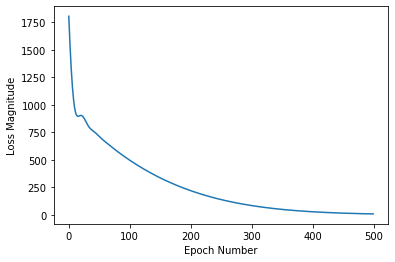

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

### Use o modelo para prever valores

Agora você tem um modelo que foi treinado para aprender a relação entre `celsius_q` e` fahrenheit_a`. Você pode usar o método de previsão para calcular os graus Fahrenheit para graus Celsius anteriormente desconhecidos.

Então, por exemplo, se o valor Celsius for 100, o que você acha que será o resultado Fahrenheit? Tome uma suposição antes de você executar este código.

In [ ]:
print(model.predict([100.0]))

[[211.33437]]


A resposta correta é $100 \times 1.8 + 32 = 212$, então nosso modelo está indo muito bem.

#### Recapitulando

* Criamos um modelo com uma camada Densa.
* Treinamos com 3500 exemplos (7 pares, mais de 500 épocas).

Nosso modelo ajustou os parâmetros (pesos) na camada Densa até que ele pudesse retornar o valor Fahrenheit correto para qualquer valor Celsius. (Lembre-se, 100 Celsius não fazia parte dos nossos dados de treinamento).



### Olhando para os pesos da camada

Finalmente, vamos imprimir as parâmetros internas da camada Densa.

In [ ]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8211087]], dtype=float32), array([29.22349], dtype=float32)]


A primeira variável está próxima de ~ 1,8 e a segunda de ~ 32. Esses valores (1,8 e 32) são as variáveis reais na fórmula de conversão real.

Isso está realmente próximo dos valores na fórmula de conversão. Realmente uma camada Densa funciona para um único neurônio com uma única entrada e uma única saída, a matemática interna parece a mesma que [a equação de uma linha](https: / /pt.wikipedia.org/wiki/Linear_equation#Slope%E2%80%93intercept_form), $y = mx + b$, que tem a mesma forma que a equação de conversão, $f = 1.8c + 32$.

Ja que a forma é a mesma, os parâmetros devem convergir nos valores padrão de $1,8$ e $32$ o que é exatamente o que aconteceu.

Com neurônios adicionais, entradas adicionais e saídas adicionais, a fórmula se torna muito mais complexa, mas a ideia é a mesma.

#### Um pequeno experimento


Apenas por diversão, e se criarmos camadas densas com diferentes unidades, implicando que também temos mais parâmetros?

In [ ]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])

model.summary()

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)

print("Finished training the model")

print(model.predict([100.0]))

print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))

print("These are the l0 variables: {}\n".format(l0.get_weights()))
print("These are the l1 variables: {}\n".format(l1.get_weights()))
print("These are the l2 variables: {}\n".format(l2.get_weights()))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 4)                 8         
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
Finished training the model
[[211.74744]]
Model predicts that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit
These are the l0 variables: [array([[ 0.17612968,  0.7264293 , -0.270562  , -0.08248407]],
      dtype=float32), array([-0.77135736,  3.528617  , -3.3204653 ,  2.992622  ], dtype=float32)]

These are the l1 variables: [array([[ 0.49111125,  0.06399501,  0.06550459,  0.

Como você pode ver, este modelo também é capaz de prever o valor Fahrenheit correspondente muito bem. Mas quando você olha para as variáveis (pesos) nas camadas `l0` e` l1`, elas não são nada perto de ~ 1.8 e ~ 32. A complexidade adicionada oculta a forma "simples" da equação de conversão.

## Recapitulando

Parabéns! Você acabou de treinar seu primeiro modelo de aprendizado de máquina. Vimos que, treinando o modelo com dados de entrada e a saída correspondente, o modelo aprendeu a multiplicar a entrada por 1,8 e depois adicionar 32 para obter o resultado correto.

<img src='https://drive.google.com/uc?id=1ENCDPR3g0WqydjGzKDttlT_lx-w-sLEF'>

Isso foi realmente impressionante, considerando que precisávamos apenas de algumas linhas de código:

```python
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([l0])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
model.predict([100.0])

```

Este exemplo é o plano geral de qualquer programa de aprendizado de máquina. Você usará a mesma estrutura para criar e treinar sua rede neural e usá-la para fazer previsões.

### O processo de treinamento

No processo de treinamento (que acontece quando é chamado o metodo `model.fit (...)`) os  parâmetros internos do modelo são ajustados com o intuito de obter os melhores valores possíveis, de modo que permitam um correto mapeamento da entrada para a saída. Tal processo de ajuste é efetuado por meio de um algoritmo de otimização denominado Gradiente Descente, que usa análise numérica para encontrar os melhores valores possíveis para os parâmetros internos do modelo.
* **O Gradiente Descendente** ajusta iterativamente os parâmetros do modelo, dislocando-os na direção correta um pouco de cada vez até que alcancem os melhores valores. Nesse caso, “melhores valores” significa que modifica-los mais levaria o modelo a um pior desempenho. A função que mede quão bom ou ruim o modelo é durante cada iteração é chamada de “função de perda”, e o objetivo de cada dislocamento é “minimizar a função de perda”.

O processo de treinamento começa com um propagação para frente (*forward pass*), onde os dados de entrada são enviados para o modelo (veja a Fig.1). Em seguida, o modelo aplica sua matemática interna na entradas e parâmetros internos do modelo para prever uma resposta ("O nodelo Prevê um valor" na Figura 1).
* Em nosso exemplo, a entrada foi os graus em Celsius, e o modelo previu os graus correspondentes em Fahrenheit.


<center>
**Figura 1**. Forward Pass.  
</center>
<center>
<img src='https://drive.google.com/uc?id=1qF9zvCc2KrvefN2AN99g9GLQOOxIIqUx' width=100%>
</center>

Quando um valor é previsto, a diferença entre esse valor previsto e o valor correto é calculada. Essa diferença é chamada de perda e é uma medida de quão bem o modelo executou a tarefa de mapeamento. O valor da perda é calculado usando uma função de perda, que especificamos com o parâmetro `loss` ao chamar ao método `model.compile()`.

Depois que a perda é calculada, as parâmetros internos (pesos e vieses) de todas as camadas do modelo são ajustadas, de modo a minimizar essa perda - isto é, tornar o valor da saída mais próximo do valor correto (ver Fig. 2). ).

<center>
**Figura 2**. Backward Pass.  
</center>
<center>
<img src='https://drive.google.com/uc?id=1IQ4Xqsk-Thv_hkv3hY-ogJg-4vlzEvjP' width=100%>
</center>

Esse processo de otimização é chamado de gradiente descendente. O algoritmo específico usado para calcular o novo valor de cada variável interna é especificado pelo parâmetro `optimizer` ao chamar ao método `model.compile(...)`. Neste exemplo, usamos o otimizador `Adam`.
* Se você tiver interesse em saber mais detalhes sobre como o processo de treinamento funciona, consulte a [lição sobre como reduzir a perda no curso intensivo de aprendizado de máquina do Google](https://developers.google.com/machine-learning/crash-course/reducing-loss/video-lecture).

Até este momento você deve estar familizarizado com os seguintes termos:
* **Característica (*feature*)**: A(s) entrada(s) ao nosso modelo.
* **Exemplos**: um par de entrada / saída usado para treinamento
* **Rotulos (*labels*)**: A saída do modelo.
* **Camada (*layer*)**: Uma coleção de nós conectados juntos dentro de uma rede neural.
* **Modelo**: A representação da sua rede neural
* **Camadas Densas e totalmente conectadas (FC)**: cada nó em uma camada é conectada a cada nó na camada anterior.
* **Pesos e vieses (*weights and biases*)**: os parâmetros internos do modelo
* **Perda (*Loss*)**: A discrepância entre a saída desejada e a saída real
* **MSE**: Erro quadrático médio, um tipo de função de perda que conta um pequeno número de grandes discrepâncias como pior do que um grande número de pequenas.
* **Gradiente Descendente**: Um algoritmo que altera as parâmetros internos um pouco de cada vez para reduzir gradualmente a função de perda.
* **Otimizador**: Uma implementação específica do algoritmo de gradiente descendente.
* **Taxa de aprendizado (*Learning rate*)**: O “tamanho do passo” para melhoria da perda durante a descida do gradiente.
* **Lote (*Batch*)**: O conjunto de exemplos usados durante o treinamento do modelo
* **Época (Epoch)**: uma passagem completa sobre todo o conjunto de dados de treinamento
* **Propagação para Frente (*Forward pass*)**: O cálculo dos valores de saída a partir entrada
* **Propagação para Atras/retropropagação (*Backward pass/backpropagation*)**: O cálculo dos ajustes das parâmetros tinternos do modelo de acordo com o algoritmo otimizador, começando da camada de saída e retornando através de cada camada até a entrada.


## PROBLEMAS

**Problema 1 **. Usando `numpy` você deve criar 500 pontos aleatórios ao redor da equação $y = 0.22x + 0.78$. Exemplo:

```python
number_of_points = 500
x_point	=	[]
y_point	=	[]
...  
plt.plot(x_point,y_point,	'o',	label='Input	Data')
plt.legend()
plt.show()
```



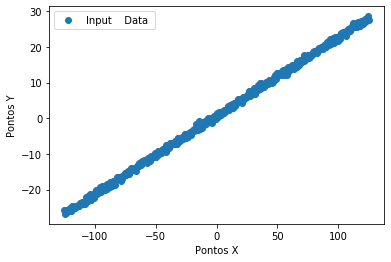

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

number_of_points = 500
x_inicial = -number_of_points/4
x_final = number_of_points/4
x_point = np.linspace(x_inicial, x_final, number_of_points)
ruido = (np.random.randn(number_of_points))/2
y_point = 0.22*x_point + 0.78 + ruido
coord = list(zip(x_point, y_point))
plt.plot(x_point,y_point,    'o',    label='Input    Data ')
plt.legend()
plt.xlabel('Pontos X')
plt.ylabel('Pontos Y')
plt.show()

**Problema 2 **. Tomando como referência os pasos descritos na sessão  **Criando o Primeiro Modelo**, construa um modelo linear do conjunto de dados 2D gerados no problema 1. Os hiperparametros a usar para o otimizador devem ser:
  *  `loss` = `mean_squared_error`;
  *  `optimizer` = `Adam`;
  * `learning_rate` = $0.1$;
  *  `Epooch` = $10$.
  
  Grafique a curva que gera o modelo sobre o conjunto de dados

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Finished training the model
[[0.77476466]]


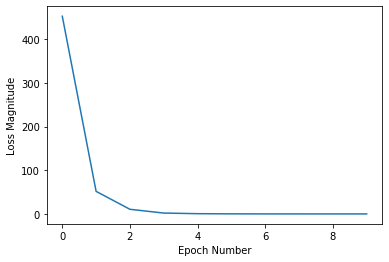

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Criando pontos
number_of_points = 500
x_inicial = -number_of_points/4
x_final = number_of_points/4
x_point = np.linspace(x_inicial, x_final, number_of_points)
ruido = (np.random.randn(number_of_points))/2
y_point = 0.22*x_point + 0.78 + ruido
y_antes=y_point
x_antes=x_point

# Modelo
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model.summary()
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

# Treinando o Modelo
history = model.fit(x_point, y_point, epochs=10, verbose=False)
print("Finished training the model")

print(model.predict([0]))

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

**Problema 3 **. Usando Sklearn, carregamos o banco de dados Iris flower data set

```python
from sklearn import datasets

iris = datasets.load_iris()
x_point = np.array([x[3] for x in iris.data])
y_point = np.array([y[0] for y in iris.data])

plt.plot(x_point,y_point,	'o',	label='Input	Data')
plt.legend()
plt.show()
```
Determine o modelo linear do conjunto de dados 2D gerados apartir do Iris flower data set. Os hiperparametros a usar para o otimizador devem ser:
  *  `loss` = `mean_squared_error`;
  *  `optimizer` = `Adam`;
  * `learning_rate` = $0.1$;
  *  `Epooch` = definido pelo usuario.
  
Grafique a curva que gera o modelo sobre o conjunto de dados.

Digite o número de epocas desejado10


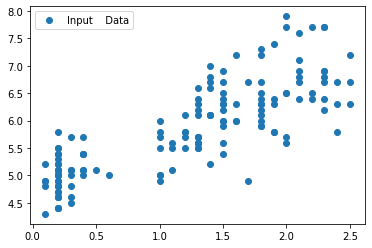

Finished training the model


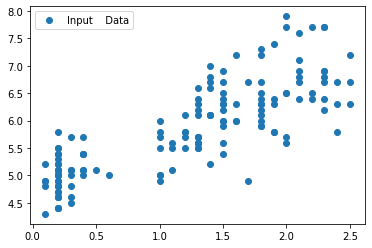

In [ ]:
from sklearn import datasets
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

ep=int(input("Digite o número de epocas desejado"))
iris = datasets.load_iris()
x_point = np.array([x[3] for x in iris.data])
y_point = np.array([y[0] for y in iris.data])

plt.plot(x_point,y_point,    'o',    label='Input    Data')
plt.legend()
plt.show()

# Modelo
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

# Treinando o Modelo
history = model.fit(x_point, y_point, epochs=ep, verbose=False)
print("Finished training the model")

plt.plot(x_point,y_point,    'o',    label='Input    Data')
plt.legend()
plt.show()